/tmp/ipykernel_51268/2683972416.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ds.satisfaction=new_ds.satisfaction.replace(satisfaction_dict)
/tmp/ipykernel_51268/2683972416.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ds.Class= new_ds.Class.replace(class_dict)


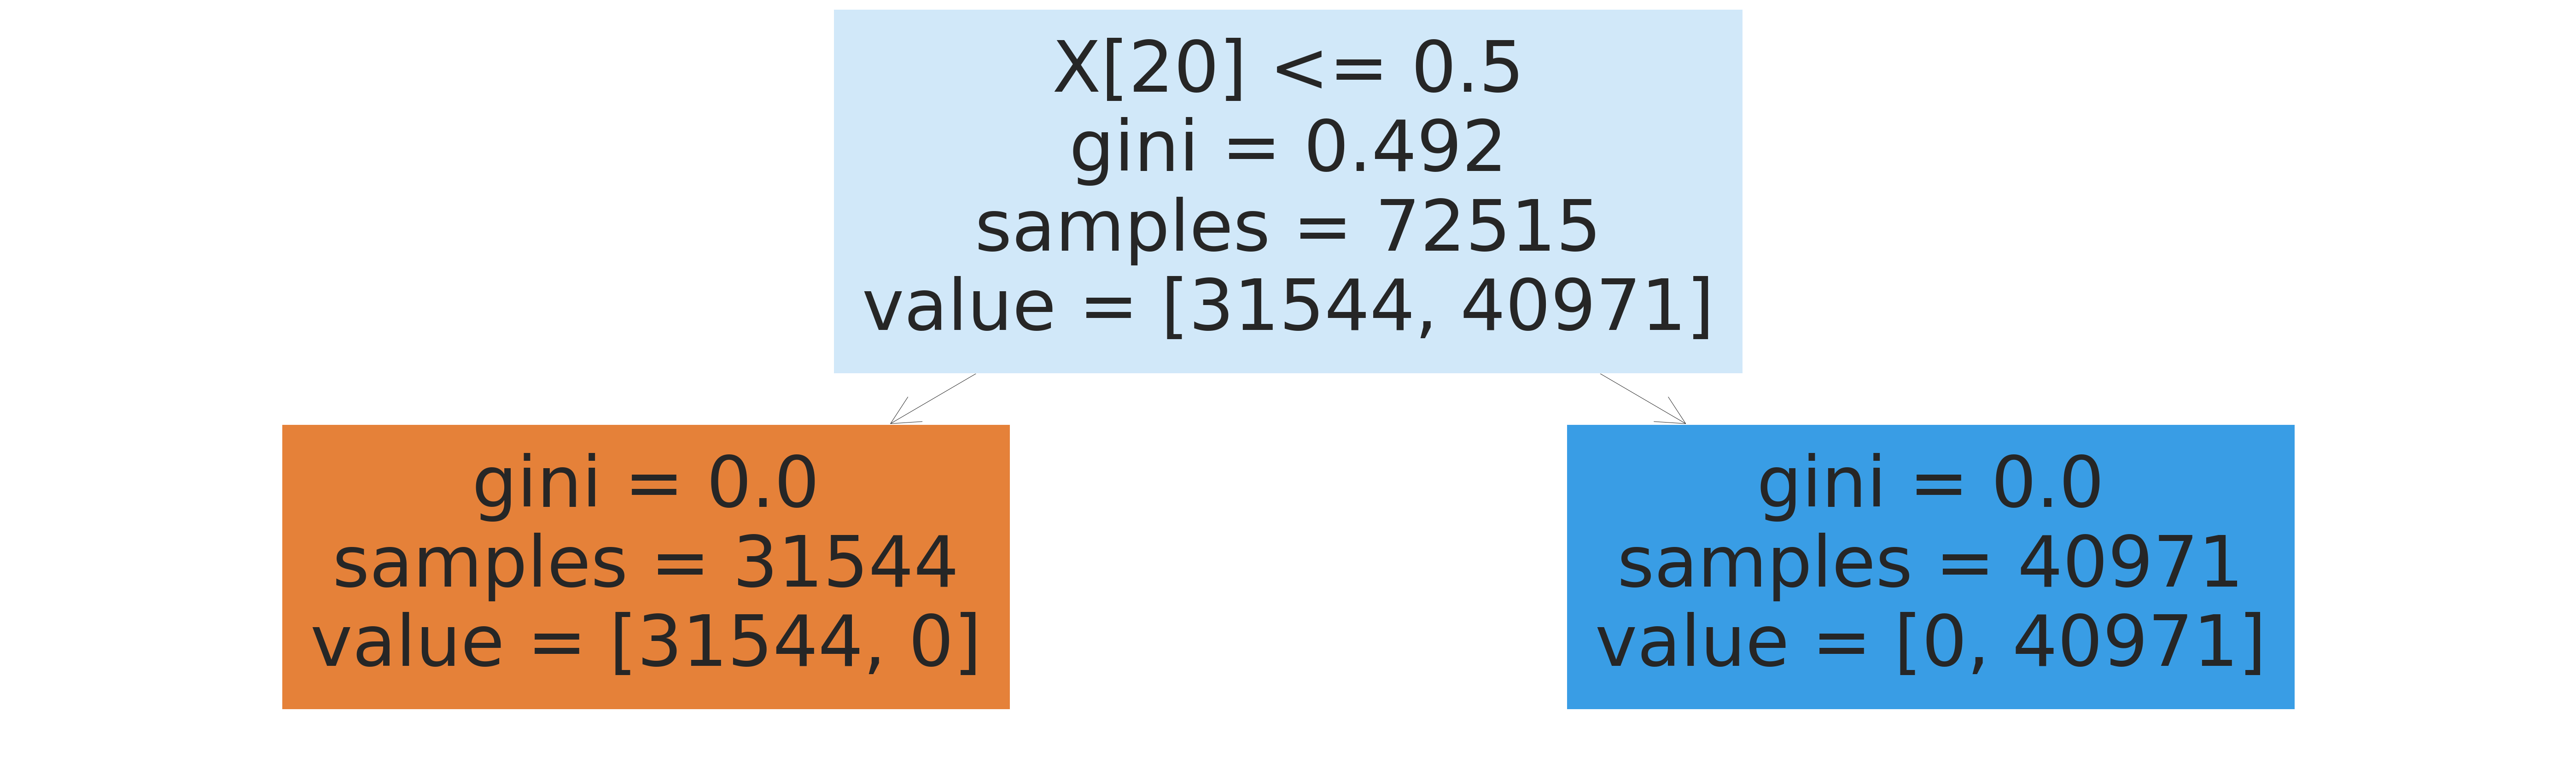

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'


ds = pd.read_csv("././././flights/train.csv")

new_ds = ds.dropna()

satisfaction_dict = {
    'satisfied':0,
    'neutral or dissatisfied':1
}

class_dict={
    'Business':0,
    'Eco':1,
    'Eco Plus':4
}

new_ds.satisfaction=new_ds.satisfaction.replace(satisfaction_dict)
new_ds.Class= new_ds.Class.replace(class_dict)


x=new_ds.drop(['id', 'Gender','Customer Type','Type of Travel'], axis=1)
y=new_ds.satisfaction

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


from sklearn import tree
plt.figure(figsize=(100,30), facecolor='w')

a = tree.plot_tree(clf, filled=True)
plt.savefig('new_tree.png')
plt.show()